GLCM features and labels extraction for balanced training dataset

In [ ]:
# Step 1: Install necessary libraries
!pip install --upgrade opencv-python pandas mahotas

# Step 2: Import necessary libraries
import cv2
import numpy as np
import os
import pandas as pd
import mahotas
from google.colab import drive
import logging

# Step 3: Configure logging
logging.basicConfig(filename='/content/drive/My Drive/glcm_validation_feature_extraction.log',
                    level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')

# Step 4: Define feature extraction function
def extract_haralick_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Ensure the image is in 8-bit format
    if gray.dtype != np.uint8:
        gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Extract Haralick features
    haralick_features = mahotas.features.haralick(gray).mean(axis=0)

    # Haralick features are 13-dimensional
    return haralick_features

# Step 5: Mount Google Drive
drive.mount('/content/drive')

# Step 6: Define dataset and output paths
dataset_path = '/content/drive/My Drive/training data'  # Adjust this path as needed
glcm_output_path = '/content/drive/My Drive/glcm_training_features.csv'  # Change to your desired output path
glcm_labels_output_path = '/content/drive/My Drive/glcm_training_labels.csv'  # Output path for labels

# Step 7: Define function to process images
def process_images_from_dataset(dataset_path):
    glcm_features = []
    glcm_labels = []

    # Iterate over each subfolder in the dataset directory
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        if os.path.isdir(subfolder_path):
            # Iterate over each image in the subfolder
            for filename in os.listdir(subfolder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image formats
                    img_path = os.path.join(subfolder_path, filename)
                    image = cv2.imread(img_path)
                    if image is not None:
                        try:
                            haralick_feature = extract_haralick_features(image)  # Extract Haralick features
                            glcm_features.append(haralick_feature)  # Store GLCM features
                            glcm_labels.append(subfolder)  # Store the label (subfolder name)
                        except Exception as e:
                            logging.error(f"Error processing image {img_path}: {e}")
                    else:
                        logging.warning(f"Unable to read image {img_path}")

    return glcm_features, glcm_labels

# Step 8: Define functions to save features and labels to CSV
def save_features_to_csv(glcm_features, output_path):
    # Define Haralick feature column names (13 features)
    feature_columns = [
        'Angular Second Moment',
        'Contrast',
        'Correlation',
        'Variance',
        'Inverse Difference Moment',
        'Sum Average',
        'Sum Variance',
        'Sum Entropy',
        'Entropy',
        'Difference Variance',
        'Difference Entropy',
        'Information Measures of Correlation 1',
        'Information Measures of Correlation 2'
    ]

    # Create a DataFrame for GLCM features
    glcm_df = pd.DataFrame(glcm_features, columns=feature_columns)

    # Save to CSV in Google Drive
    glcm_df.to_csv(output_path, index=False)
    print(f"GLCM features extracted and saved to {output_path}.")

def save_labels_to_csv(glcm_labels, output_path):
    # Create a DataFrame for GLCM labels
    labels_df = pd.DataFrame(glcm_labels, columns=['Label'])

    # Save to CSV in Google Drive
    labels_df.to_csv(output_path, index=False)
    print(f"GLCM labels saved to {output_path}.")

# Step 9: Execute feature extraction and save to CSV
glcm_features, glcm_labels = process_images_from_dataset(dataset_path)
save_features_to_csv(glcm_features, glcm_output_path)
save_labels_to_csv(glcm_labels, glcm_labels_output_path)

# Step 10: (Optional) Verify the extracted features and labels
glcm_df = pd.read_csv(glcm_output_path)
labels_df = pd.read_csv(glcm_labels_output_path)
print(glcm_df.head())
print(labels_df.head())

print("\nMissing values in each column for features:")
print(glcm_df.isnull().sum())

print("\nMissing values in each column for labels:")
print(labels_df.isnull().sum())



GLCM features and labels extraction for balanced validation dataset

In [ ]:
# Step 1: Install necessary libraries
!pip install --upgrade opencv-python pandas mahotas

# Step 2: Import necessary libraries
import cv2
import numpy as np
import os
import pandas as pd
import mahotas

from google.colab import drive
import logging

# Step 3: Configure logging
logging.basicConfig(filename='/content/drive/My Drive/glcm_validation_feature_extraction.log',
                    level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')

# Step 4: Define feature extraction function
def extract_haralick_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Ensure the image is in 8-bit format
    if gray.dtype != np.uint8:
        gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Extract Haralick features
    haralick_features = mahotas.features.haralick(gray).mean(axis=0)

    # Haralick features are 13-dimensional
    return haralick_features

# Step 5: Mount Google Drive
drive.mount('/content/drive')

# Step 6: Define dataset and output paths
dataset_path = '/content/drive/My Drive/validation data'  # Adjust this path as needed
glcm_output_path = '/content/drive/My Drive/glcm_validation_features.csv'  # Change to your desired output path
glcm_labels_output_path = '/content/drive/My Drive/glcm_validation_labels.csv'  # Output path for labels

# Step 7: Define function to process images
def process_images_from_dataset(dataset_path):
    glcm_features = []
    glcm_labels = []

    # Iterate over each subfolder in the dataset directory
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        if os.path.isdir(subfolder_path):
            # Iterate over each image in the subfolder
            for filename in os.listdir(subfolder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image formats
                    img_path = os.path.join(subfolder_path, filename)
                    image = cv2.imread(img_path)
                    if image is not None:
                        try:
                            haralick_feature = extract_haralick_features(image)  # Extract Haralick features
                            glcm_features.append(haralick_feature)  # Store GLCM features
                            glcm_labels.append(subfolder)  # Store the label (subfolder name)
                        except Exception as e:
                            logging.error(f"Error processing image {img_path}: {e}")
                    else:
                        logging.warning(f"Unable to read image {img_path}")

    return glcm_features, glcm_labels

# Step 8: Define functions to save features and labels to CSV
def save_features_to_csv(glcm_features, output_path):
    # Define Haralick feature column names (13 features)
    feature_columns = [
        'Angular Second Moment',
        'Contrast',
        'Correlation',
        'Variance',
        'Inverse Difference Moment',
        'Sum Average',
        'Sum Variance',
        'Sum Entropy',
        'Entropy',
        'Difference Variance',
        'Difference Entropy',
        'Information Measures of Correlation 1',
        'Information Measures of Correlation 2'
    ]

    # Create a DataFrame for GLCM features
    glcm_df = pd.DataFrame(glcm_features, columns=feature_columns)

    # Save to CSV in Google Drive
    glcm_df.to_csv(output_path, index=False)
    print(f"GLCM features extracted and saved to {output_path}.")

def save_labels_to_csv(glcm_labels, output_path):
    # Create a DataFrame for GLCM labels
    labels_df = pd.DataFrame(glcm_labels, columns=['Label'])

    # Save to CSV in Google Drive
    labels_df.to_csv(output_path, index=False)
    print(f"GLCM labels saved to {output_path}.")

# Step 9: Execute feature extraction and save to CSV
glcm_features, glcm_labels = process_images_from_dataset(dataset_path)
save_features_to_csv(glcm_features, glcm_output_path)
save_labels_to_csv(glcm_labels, glcm_labels_output_path)

# Step 10: (Optional) Verify the extracted features and labels
glcm_df = pd.read_csv(glcm_output_path)
labels_df = pd.read_csv(glcm_labels_output_path)
print(glcm_df.head())
print(labels_df.head())

print("\nMissing values in each column for features:")
print(glcm_df.isnull().sum())

print("\nMissing values in each column for labels:")
print(labels_df.isnull().sum())



glcm feature extraction - test

In [ ]:
!pip install mahotas
# Import necessary libraries
import cv2
import numpy as np
import os
import pandas as pd
import mahotas
import logging
from google.colab import drive

# Configure logging
logging.basicConfig(filename='/content/drive/My Drive/glcm_validation_feature_extraction.log',
                    level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')

# Step 1: Define feature extraction function
def extract_haralick_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Ensure the image is in 8-bit format
    if gray.dtype != np.uint8:
        gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Extract Haralick features
    haralick_features = mahotas.features.haralick(gray).mean(axis=0)

    # Haralick features are 13-dimensional
    return haralick_features

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Define function to process images and store filenames and features separately
def process_images_from_dataset(dataset_path):
    glcm_features = []
    filenames = []

    # Iterate over each image in the folder
    for filename in os.listdir(dataset_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image formats
            img_path = os.path.join(dataset_path, filename)
            image = cv2.imread(img_path)
            if image is not None:
                try:
                    haralick_feature = extract_haralick_features(image)  # Extract Haralick features
                    glcm_features.append(haralick_feature)  # Store GLCM features
                    filenames.append(filename)  # Store image filenames
                except Exception as e:
                    logging.error(f"Error processing image {img_path}: {e}")
            else:
                logging.warning(f"Unable to read image {img_path}")

    return glcm_features, filenames

# Step 4: Define function to save features to a CSV file in a separate folder
def save_features_to_csv(glcm_features, output_folder):
    # Define Haralick feature column names (13 features)
    feature_columns = [
        'Angular Second Moment',
        'Contrast',
        'Correlation',
        'Variance',
        'Inverse Difference Moment',
        'Sum Average',
        'Sum Variance',
        'Sum Entropy',
        'Entropy',
        'Difference Variance',
        'Difference Entropy',
        'Information Measures of Correlation 1',
        'Information Measures of Correlation 2'
    ]

    # Create a DataFrame for GLCM features
    glcm_df = pd.DataFrame(glcm_features, columns=feature_columns)

    # Generate output file path for the features CSV
    features_output_path = os.path.join(output_folder, 'glcm_features.csv')

    # Save to CSV in the specified folder
    glcm_df.to_csv(features_output_path, index=False)
    print(f"GLCM features extracted and saved to {features_output_path}.")

# Step 5: Define function to save filenames to a separate CSV file
def save_filenames_to_csv(filenames, output_file):
    # Create a DataFrame for filenames
    filenames_df = pd.DataFrame(filenames, columns=['Filename'])

    # Save filenames to a CSV
    filenames_df.to_csv(output_file, index=False)
    print(f"Filenames saved to {output_file}.")

# Step 6: Execute feature extraction and save features to separate folder, filenames to separate file
dataset_path = '/content/drive/MyDrive/testing data'  # Folder containing images
output_folder = '/content/drive/My Drive/testfeatureglcm_output_folder'  # Folder to save features CSV
filenames_output_file = '/content/drive/My Drive/glcm_test_filenames.csv'  # CSV for filenames

# Extract features and filenames
glcm_features, filenames = process_images_from_dataset(dataset_path)

# Save features in the specified folder
save_features_to_csv(glcm_features, output_folder)

# Save filenames in the specified file
save_filenames_to_csv(filenames, filenames_output_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GLCM features extracted and saved to /content/drive/My Drive/testfeatureglcm_output_folder/glcm_features.csv.
Filenames saved to /content/drive/My Drive/glcm_test_filenames.csv.



Transductive GLCM for validation metrics

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.semi_supervised import LabelSpreading
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer  # To handle NaN values
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
                             precision_score, recall_score, confusion_matrix, average_precision_score, roc_curve)
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from google.colab import drive

# Step 1: Mount Google Drive to load the dataset
drive.mount('/content/drive')

# Step 2: Define paths for training, validation, and test data
train_features_path = '/content/drive/MyDrive/glcm_training_features.csv'
train_labels_path = '/content/drive/MyDrive/glcm_training_labels.csv'
val_features_path = '/content/drive/MyDrive/glcm_validation_features.csv'
val_labels_path = '/content/drive/MyDrive/glcm_validation_labels.csv'
test_features_path = '/content/drive/MyDrive/testfeatureglcm_output_folder/glcm_features.csv'
test_filenames_path = '/content/drive/MyDrive/glcm_test_filenames.csv'

# Step 3: Load training, validation, and test data
train_features = pd.read_csv(train_features_path)
train_labels = pd.read_csv(train_labels_path)
val_features = pd.read_csv(val_features_path)
val_labels = pd.read_csv(val_labels_path)
test_features = pd.read_csv(test_features_path)
test_filenames = pd.read_csv(test_filenames_path)

# Check if data is loaded correctly
assert len(test_features) == len(test_filenames), "Mismatch between test features and filenames!"

# Step 4: Combine training and validation features and labels
train_val_features = pd.concat([train_features, val_features])
train_val_labels = pd.concat([train_labels, val_labels])

# Step 5: Encode labels (convert categorical labels to numeric form)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(train_val_labels['Label'])

# Step 6: Prepare combined data for transductive learning
# Concatenate training+validation features and test features
X_combined = pd.concat([train_val_features, test_features])

# Step 7: Handle missing or invalid values in the features (e.g., NaNs)
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
X_combined_imputed = imputer.fit_transform(X_combined)

# Step 8: Normalize features using StandardScaler
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined_imputed)

# Prepare labels: known labels for training/validation, and -1 for test (unlabeled)
y_combined = np.concatenate([encoded_labels, [-1]*len(test_features)])

# Step 9: Apply Label Spreading for transductive learning
label_spreading = LabelSpreading(kernel='rbf', alpha=0.2)
label_spreading.fit(X_combined_scaled, y_combined)

# Step 10: Predict probabilities and labels for the test data
# Normalize test features as well before predicting
test_features_imputed = imputer.transform(test_features)
test_features_scaled = scaler.transform(test_features_imputed)

test_probabilities = label_spreading.predict_proba(test_features_scaled)
test_labels = label_spreading.predict(test_features_scaled)

# Check for NaN values in predicted probabilities and handle them (replace NaNs with 0)
test_probabilities = np.nan_to_num(test_probabilities, nan=0.0)

# Step 11: Convert predicted probabilities to DataFrame
probability_df = pd.DataFrame(test_probabilities, columns=label_encoder.classes_)

# Convert predicted labels to DataFrame
label_df = pd.DataFrame(test_labels, columns=['Predicted Label'])
label_df['Predicted Label'] = label_encoder.inverse_transform(label_df['Predicted Label'])

# Step 12: Save the predicted probabilities and labels along with filenames
output_file_probabilities = '/content/drive/My Drive/glcm_test_prob_met3.csv'
output_file_labels = '/content/drive/My Drive/glcm_test_labels_met3.csv'

# Reset index of filenames to match predictions (in case they were misaligned)
test_filenames = test_filenames.reset_index(drop=True)

# Concatenate filenames and prediction probabilities
output_probabilities = pd.concat([test_filenames, probability_df], axis=1)
output_labels = pd.concat([test_filenames, label_df], axis=1)

# Ensure the lengths match
assert len(output_probabilities) == len(test_filenames), "Mismatch between filenames and predicted probabilities!"
assert len(output_labels) == len(test_filenames), "Mismatch between filenames and predicted labels!"

# Save the output to CSV
output_probabilities.to_csv(output_file_probabilities, index=False)
output_labels.to_csv(output_file_labels, index=False)

print(f"Predicted probabilities for test dataset saved to {output_file_probabilities}")
print(f"Predicted labels for test dataset saved to {output_file_labels}")

# Step 13: Evaluate the model on the validation data
# Extract validation data features and true labels
val_features_imputed = imputer.transform(val_features)
val_features_scaled = scaler.transform(val_features_imputed)
val_true_labels = label_encoder.transform(val_labels['Label'])

# Predict the probabilities and labels for the validation data
val_probabilities = label_spreading.predict_proba(val_features_scaled)
val_predicted_labels = label_spreading.predict(val_features_scaled)

# Calculate accuracy
accuracy = accuracy_score(val_true_labels, val_predicted_labels)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(val_true_labels, val_predicted_labels)

# Calculate AUC-ROC for each class in one-vs-rest format
class_auc_roc = roc_auc_score(val_true_labels, val_probabilities, multi_class='ovr', average=None)

# Display the AUC-ROC for each class
print("\nAUC-ROC per Class:")
for i, auc in enumerate(class_auc_roc):
    print(f"AUC-ROC for class {label_encoder.classes_[i]}: {auc:.4f}")

# Calculate mean AUC-ROC across all classes (macro-average)
auc_roc_macro = roc_auc_score(val_true_labels, val_probabilities, multi_class='ovr', average='macro')
print(f"\nMean AUC-ROC (Macro Average): {auc_roc_macro:.4f}")

# Plot AUC-ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(val_true_labels == i, val_probabilities[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'AUC for class {label_encoder.classes_[i]}: {class_auc_roc[i]:.4f}')

# Plotting the diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.grid()

# Save the ROC plot as a PNG file
roc_plot_path = '/content/drive/My Drive/roc_curves.png'  # Specify the path where you want to save the plot
plt.savefig(roc_plot_path, format='png', bbox_inches='tight')  # Save as PNG
plt.show()


# Calculate precision (macro average)
precision = precision_score(val_true_labels, val_predicted_labels, average='macro')

# Calculate recall (Sensitivity)
recall = recall_score(val_true_labels, val_predicted_labels, average='macro')

# Calculate F1 score (macro average)
f1 = f1_score(val_true_labels, val_predicted_labels, average='macro')

# Calculate average precision (macro average)
avg_precision = average_precision_score(val_true_labels, val_probabilities, average='macro')

# Confusion matrix to derive specificity
conf_matrix = confusion_matrix(val_true_labels, val_predicted_labels)

# Specificity calculation from confusion matrix
tn = conf_matrix.sum(axis=1) - conf_matrix.diagonal()
fp = conf_matrix.sum(axis=0) - conf_matrix.diagonal()

specificity_per_class = tn / (tn + fp)
mean_specificity = specificity_per_class.mean()

# Print all evaluation metrics
print("\nEvaluation Metrics on Validation Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Mean Specificity: {mean_specificity:.4f}")


Transductive algorithm for testing dataset

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.semi_supervised import LabelSpreading
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer  # To handle NaN values
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
                             precision_score, recall_score, confusion_matrix, average_precision_score)
from google.colab import drive

# Step 1: Mount Google Drive to load the dataset
drive.mount('/content/drive')

# Step 2: Define paths for training, validation, and test data
train_features_path = '/content/drive/MyDrive/glcm_training_features.csv'
train_labels_path = '/content/drive/MyDrive/glcm_training_labels.csv'
val_features_path = '/content/drive/MyDrive/glcm_validation_features.csv'
val_labels_path = '/content/drive/MyDrive/glcm_validation_labels.csv'
test_features_path = '/content/drive/MyDrive/testfeatureglcm_output_folder/glcm_features.csv'
test_filenames_path = '/content/drive/MyDrive/glcm_test_filenames.csv'

# Step 3: Load training, validation, and test data
train_features = pd.read_csv(train_features_path)
train_labels = pd.read_csv(train_labels_path)
val_features = pd.read_csv(val_features_path)
val_labels = pd.read_csv(val_labels_path)
test_features = pd.read_csv(test_features_path)
test_filenames = pd.read_csv(test_filenames_path)

# Check if data is loaded correctly
assert len(test_features) == len(test_filenames), "Mismatch between test features and filenames!"

# Step 4: Combine training and validation features and labels
train_val_features = pd.concat([train_features, val_features])
train_val_labels = pd.concat([train_labels, val_labels])

# Step 5: Encode labels (convert categorical labels to numeric form)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(train_val_labels['Label'])

# Step 6: Prepare combined data for transductive learning
# Concatenate training+validation features and test features
X_combined = pd.concat([train_val_features, test_features])

# Step 7: Handle missing or invalid values in the features (e.g., NaNs)
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
X_combined_imputed = imputer.fit_transform(X_combined)

# Step 8: Normalize features using StandardScaler
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined_imputed)

# Prepare labels: known labels for training/validation, and -1 for test (unlabeled)
y_combined = np.concatenate([encoded_labels, [-1]*len(test_features)])

# Step 9: Apply Label Spreading for transductive learning
label_spreading = LabelSpreading(kernel='rbf', alpha=0.2)
label_spreading.fit(X_combined_scaled, y_combined)

# Step 10: Predict probabilities and labels for the test data
# Normalize test features as well before predicting
test_features_imputed = imputer.transform(test_features)
test_features_scaled = scaler.transform(test_features_imputed)

test_probabilities = label_spreading.predict_proba(test_features_scaled)
test_labels = label_spreading.predict(test_features_scaled)

# Check for NaN values in predicted probabilities and handle them (replace NaNs with 0)
test_probabilities = np.nan_to_num(test_probabilities, nan=0.0)

# Step 11: Convert predicted probabilities to DataFrame
probability_df = pd.DataFrame(test_probabilities, columns=label_encoder.classes_)

# Convert predicted labels to DataFrame
label_df = pd.DataFrame(test_labels, columns=['Predicted Label'])
label_df['Predicted Label'] = label_encoder.inverse_transform(label_df['Predicted Label'])

# Step 12: Save the predicted probabilities and labels along with filenames
output_file_probabilities = '/content/drive/My Drive/glcm_test_prob_met.csv'
output_file_labels = '/content/drive/My Drive/glcm_test_labels_met.csv'

# Reset index of filenames to match predictions (in case they were misaligned)
test_filenames = test_filenames.reset_index(drop=True)

# Concatenate filenames and prediction probabilities
output_probabilities = pd.concat([test_filenames, probability_df], axis=1)
output_labels = pd.concat([test_filenames, label_df], axis=1)

# Ensure the lengths match
assert len(output_probabilities) == len(test_filenames), "Mismatch between filenames and predicted probabilities!"
assert len(output_labels) == len(test_filenames), "Mismatch between filenames and predicted labels!"

# Save the output to CSV
output_probabilities.to_csv(output_file_probabilities, index=False)
output_labels.to_csv(output_file_labels, index=False)

print(f"Predicted probabilities for test dataset saved to {output_file_probabilities}")
print(f"Predicted labels for test dataset saved to {output_file_labels}")

# Step 13: Evaluate the model on the validation data
# Extract validation data features and true labels
val_features_imputed = imputer.transform(val_features)
val_features_scaled = scaler.transform(val_features_imputed)
val_true_labels = label_encoder.transform(val_labels['Label'])

# Predict the probabilities and labels for the validation data
val_probabilities = label_spreading.predict_proba(val_features_scaled)
val_predicted_labels = label_spreading.predict(val_features_scaled)

# Calculate accuracy
accuracy = accuracy_score(val_true_labels, val_predicted_labels)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(val_true_labels, val_predicted_labels)

# Calculate AUC-ROC for each class and compute the mean AUC
auc_roc = roc_auc_score(val_true_labels, val_probabilities, multi_class='ovr', average='macro')

# Calculate precision (macro average)
precision = precision_score(val_true_labels, val_predicted_labels, average='macro')

# Calculate recall (Sensitivity)
recall = recall_score(val_true_labels, val_predicted_labels, average='macro')

# Calculate F1 score (macro average)
f1 = f1_score(val_true_labels, val_predicted_labels, average='macro')

# Calculate average precision (macro average)
avg_precision = average_precision_score(val_true_labels, val_probabilities, average='macro')

# Confusion matrix to derive specificity
conf_matrix = confusion_matrix(val_true_labels, val_predicted_labels)

# Specificity calculation from confusion matrix
tn = conf_matrix.sum(axis=1) - conf_matrix.diagonal()
fp = conf_matrix.sum(axis=0) - conf_matrix.diagonal()

specificity_per_class = tn / (tn + fp)
mean_specificity = specificity_per_class.mean()

# Print all evaluation metrics
print("\nEvaluation Metrics on Validation Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Mean AUC-ROC: {auc_roc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Mean Specificity: {mean_specificity:.4f}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Predicted probabilities for test dataset saved to /content/drive/My Drive/glcm_test_prob_met.csv
Predicted labels for test dataset saved to /content/drive/My Drive/glcm_test_labels_met.csv

Evaluation Metrics on Validation Data:
Accuracy: 0.9514
Balanced Accuracy: 0.9514
Mean AUC-ROC: 0.9986
Precision: 0.9544
Sensitivity (Recall): 0.9514
F1 Score: 0.9520
Average Precision: 0.9882
Mean Specificity: 0.5974


TypeError: unsupported format string passed to numpy.ndarray.__format__

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Evaluation Metrics on Validation Data:
Accuracy: 0.9514
Balanced Accuracy: 0.9514
Mean AUC-ROC: 0.9986
Precision: 0.9544
Sensitivity (Recall): 0.9514
F1 Score: 0.9520
Average Precision: 0.9882
Specificity: 0.5974
Mean Sensitivity: 0.9514
Mean F1 Score: 0.9520
Mean Average Precision: 0.9882


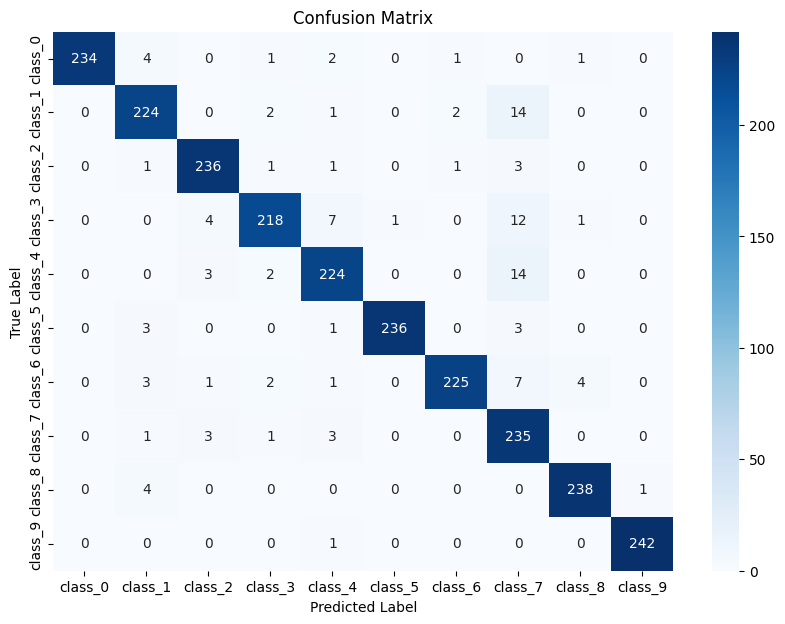

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.semi_supervised import LabelSpreading
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer  # To handle NaN values
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
                             precision_score, recall_score, confusion_matrix, average_precision_score)
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Mount Google Drive to load the dataset
drive.mount('/content/drive')

# Step 2: Define paths for training, validation, and test data
train_features_path = '/content/drive/MyDrive/glcm_training_features.csv'
train_labels_path = '/content/drive/MyDrive/glcm_training_labels.csv'
val_features_path = '/content/drive/MyDrive/glcm_validation_features.csv'
val_labels_path = '/content/drive/MyDrive/glcm_validation_labels.csv'
test_features_path = '/content/drive/MyDrive/testfeatureglcm_output_folder/glcm_features.csv'
test_filenames_path = '/content/drive/MyDrive/glcm_test_filenames.csv'

# Step 3: Load training, validation, and test data
train_features = pd.read_csv(train_features_path)
train_labels = pd.read_csv(train_labels_path)
val_features = pd.read_csv(val_features_path)
val_labels = pd.read_csv(val_labels_path)
test_features = pd.read_csv(test_features_path)
test_filenames = pd.read_csv(test_filenames_path)

# Check if data is loaded correctly
assert len(test_features) == len(test_filenames), "Mismatch between test features and filenames!"

# Step 4: Combine training and validation features and labels
train_val_features = pd.concat([train_features, val_features])
train_val_labels = pd.concat([train_labels, val_labels])

# Step 5: Encode labels (convert categorical labels to numeric form)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(train_val_labels['Label'])

# Step 6: Prepare combined data for transductive learning
# Concatenate training+validation features and test features
X_combined = pd.concat([train_val_features, test_features])

# Step 7: Handle missing or invalid values in the features (e.g., NaNs)
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
X_combined_imputed = imputer.fit_transform(X_combined)

# Step 8: Normalize features using StandardScaler
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined_imputed)

# Prepare labels: known labels for training/validation, and -1 for test (unlabeled)
y_combined = np.concatenate([encoded_labels, [-1]*len(test_features)])

# Step 9: Apply Label Spreading for transductive learning
label_spreading = LabelSpreading(kernel='rbf', alpha=0.2)
label_spreading.fit(X_combined_scaled, y_combined)

# Step 10: Evaluate the model on the validation data (without using test data)

# Extract validation data features and true labels
val_features_imputed = imputer.transform(val_features)
val_features_scaled = scaler.transform(val_features_imputed)
val_true_labels = label_encoder.transform(val_labels['Label'])

# Predict the probabilities and labels for the validation data
val_probabilities = label_spreading.predict_proba(val_features_scaled)
val_predicted_labels = label_spreading.predict(val_features_scaled)

# Calculate metrics for the validation set:

# Accuracy
accuracy = accuracy_score(val_true_labels, val_predicted_labels)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(val_true_labels, val_predicted_labels)

# Mean AUC-ROC
auc_roc = roc_auc_score(val_true_labels, val_probabilities, multi_class='ovr', average='macro')

# Precision (Macro Average)
precision = precision_score(val_true_labels, val_predicted_labels, average='macro')

# Sensitivity (Recall) (Macro Average)
recall = recall_score(val_true_labels, val_predicted_labels, average='macro')

# F1 Score (Macro Average)
f1 = f1_score(val_true_labels, val_predicted_labels, average='macro')

# Average Precision (Macro Average)
avg_precision = average_precision_score(val_true_labels, val_probabilities, average='macro')

# Confusion matrix to derive specificity and sensitivity
conf_matrix = confusion_matrix(val_true_labels, val_predicted_labels)

# Specificity calculation from confusion matrix
tn = conf_matrix.sum(axis=1) - conf_matrix.diagonal()
fp = conf_matrix.sum(axis=0) - conf_matrix.diagonal()
specificity_per_class = tn / (tn + fp)
mean_specificity = specificity_per_class.mean()

# Mean Sensitivity (Recall) per class
mean_sensitivity = recall  # Macro-average of recall, already computed above

# Mean F1 Score per class
mean_f1 = f1  # Macro-average of F1 score, already computed above

# Mean Average Precision per class
mean_avg_precision = avg_precision  # Macro-average of average precision, already computed above

# Print all evaluation metrics for the validation data
print("\nEvaluation Metrics on Validation Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Mean AUC-ROC: {auc_roc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Specificity: {mean_specificity:.4f}")
print(f"Mean Sensitivity: {mean_sensitivity:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Mean Average Precision: {mean_avg_precision:.4f}")

# Step 11: Plot and print confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('/content/drive/My Drive/confusion_matrix.png')  # Save confusion matrix as PNG
plt.show()

# Step 12: Predict probabilities and labels for the test data (optional if needed in the future)
# test_probabilities = label_spreading.predict_proba(test_features_scaled)
# test_labels = label_spreading.predict(test_features_scaled)

# Step 13: Save the predicted probabilities and labels along with filenames (optional if needed in the future)
# output_file_probabilities = '/content/drive/My Drive/glcm_test_prob_met.csv'
# output_file_labels = '/content/drive/My Drive/glcm_test_labels_met.csv'
